In [5]:
import numpy as np
import pandas as pd

In [6]:
np.linspace(-10,10,100)

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [7]:

array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])

result = np.hstack((array1, array2))
print(result)


[1 2 3 4 5 6]


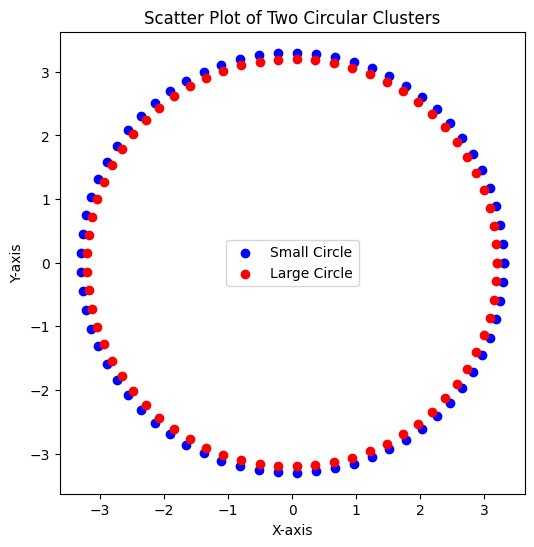

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the circles
small_radius = 3.3
large_radius = 3.2
center_x = 0
center_y = 0
num_points = 70  # Number of points in each circle

# Generate points for the small circle
theta_small = np.linspace(0, 2 * np.pi, num_points)
x_small = center_x + small_radius * np.cos(theta_small)
y_small = center_y + small_radius * np.sin(theta_small)

# Generate points for the large circle
theta_large = np.linspace(0, 2 * np.pi, num_points)
x_large = center_x + large_radius * np.cos(theta_large)
y_large = center_y + large_radius * np.sin(theta_large)

# Plot the circles as scatter plots
plt.figure(figsize=(6, 6))
plt.scatter(x_small, y_small, color='blue', label='Small Circle')
plt.scatter(x_large, y_large, color='red', label='Large Circle')
#plt.gca().set_aspect('equal', adjustable='box')  # Ensure the aspect ratio is equal
plt.title('Scatter Plot of Two Circular Clusters')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


In [1]:
import numpy as np
import plotly.graph_objects as go
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :3]  # We take the first three features for 3D plotting
y = iris.target

print(X.shape,y.shape)
# We'll use only two classes for simplicity (binary classification)
X = X[y != 2]
y = y[y != 2]
print(X.shape,y.shape)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the classifier
svm_classifier.fit(X_train, y_train)

def plot_decision_boundary_3d(clf, X, y):
    # Create a 3D scatter plot
    fig = go.Figure()

    # Plot the points
    fig.add_trace(go.Scatter3d(
        x=X[:, 0], y=X[:, 1], z=X[:, 2],
        mode='markers',
        marker=dict(size=5, color=y, colorscale='Viridis', opacity=0.8),
        name='Data Points'
    ))

    # Create a mesh grid for the decision boundary and margin planes
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))

    # Calculate decision boundary plane (decision function = 0)
    zz_decision = -(clf.coef_[0, 0] * xx + clf.coef_[0, 1] * yy + clf.intercept_[0]) / clf.coef_[0, 2]

    # Calculate margin planes (decision function = +/-1)
    zz_margin_positive = -(clf.coef_[0, 0] * xx + clf.coef_[0, 1] * yy + clf.intercept_[0] - 1) / clf.coef_[0, 2]
    zz_margin_negative = -(clf.coef_[0, 0] * xx + clf.coef_[0, 1] * yy + clf.intercept_[0] + 1) / clf.coef_[0, 2]

    # Plot decision boundary surface
    fig.add_trace(go.Surface(
        x=xx, y=yy, z=zz_decision,
        colorscale='Blues', opacity=0.5,
        name='Decision Boundary'
    ))

    # Plot positive margin plane
    fig.add_trace(go.Surface(
        x=xx, y=yy, z=zz_margin_positive,
        colorscale='Reds', opacity=0.3,
        name='Positive Margin Plane'
    ))

    # Plot negative margin plane
    fig.add_trace(go.Surface(
        x=xx, y=yy, z=zz_margin_negative,
        colorscale='Reds', opacity=0.3,
        name='Negative Margin Plane'
    ))

    # Plot support vectors
    fig.add_trace(go.Scatter3d(
        x=clf.support_vectors_[:, 0], y=clf.support_vectors_[:, 1], z=clf.support_vectors_[:, 2],
        mode='markers',
        marker=dict(size=10, color='red', opacity=0.8),
        name='Support Vectors'
    ))

    fig.update_layout(
        title="SVM Decision Boundary and Margins in 3D",
        scene=dict(
            xaxis_title='Feature 1',
            yaxis_title='Feature 2',
            zaxis_title='Feature 3'
        )
    )

    fig.show()

# Plot the decision boundary in 3D
plot_decision_boundary_3d(svm_classifier, X_test, y_test)


(150, 3) (150,)
(100, 3) (100,)
